In [1]:
%%time
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd
scalingFactor = 200
rxndiff=dict()

print('Starting scaling = ', scalingFactor)
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


#Growth rate = 3.0
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

gr_sim = dict()

data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor, NR_scaling = NR_scaledrates)
    gr_sim[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor, NR_scaling = NR_scaledrates)
    gr_sim[i] = (CellLatencies(sim_i))


gr_dict = {'gr_1':gr_sim}

def computedElongationLatency_gr3_v2(gr25_ptRNA,gr25_pCodon,gr_dict):
    import numpy as np

    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

Starting scaling =  200
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 54.9 s, sys: 360 ms, total: 55.2 s
Wall time: 55.3 s


In [424]:
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
pCodon_uniform = np.ones(len(gr25_pCodon))/sum(np.ones(len(gr25_pCodon)))
elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,pCodon_uniform,gr_dict)
print(elong_t)

[212.4113767426243]


In [238]:
#### tRNA shuffling

from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_tRNA_list = list()
p_tRNA_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


for i in range(100):
    ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))
    elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,gr25_pCodon,gr_dict);
    elong_t_tRNA_list.append(elong_t[0])
    p_tRNA_list.append(ptRNA_uniform)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


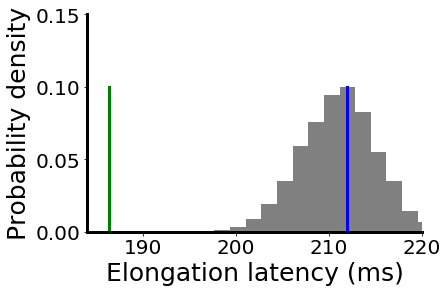

In [437]:
#### Plot tRNA shuffling
import matplotlib.pyplot as plt

p_tRNA_list=np.load('RandomtRNA_FixedCodon_10ksample_p_Codon_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_10ksample_elong_t_list.npy')

fig,ax = plt.subplots(1,1)
hist=ax.hist(elong_t_tRNA_list,20,color='grey',density=True)
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([212]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='blue')

for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

In [16]:
#### codon shuffling
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_list_codon_distrib = list()
p_Codon_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

for i in range(10000):
    pCodon_uniform = np.random.uniform(min(gr25_Codon),max(gr25_Codon),len(gr25_Codon))
    elong_t, std = computedElongationLatency_gr3_v2(gr25_ptRNA,pCodon_uniform,gr_dict);
    elong_t_list_codon_distrib.append(elong_t[0])
    p_Codon_list.append(pCodon_uniform)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


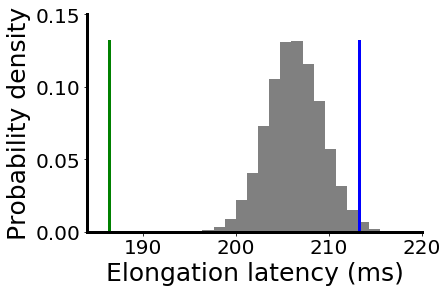

In [17]:
#### Plot codon shuffling
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
hist = ax.hist(elong_t_list_codon_distrib,color='grey', bins=20,density=True)
#hist = np.histogram(elong_t_list_codon_distrib,bins=20)
#ax.bar(hist[1][0:-1],hist[0]/sum(hist[0]),align='edge')
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([213.2]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='blue')

for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

In [18]:
#### tRNA & codon shuffling
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_list_codon_tRNA_distrib = list()
p_Codon_tRNA_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

for i in range(10000):
    pCodon_uniform = np.random.uniform(min(gr25_Codon),max(gr25_Codon),len(gr25_Codon))
    ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))
    elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,pCodon_uniform,gr_dict);
    elong_t_list_codon_tRNA_distrib.append(elong_t[0])
    p_Codon_tRNA_list.append(pCodon_uniform)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


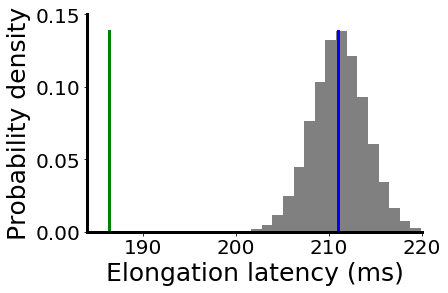

In [425]:
#### Plot tRNA+codon shuffling
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
hist=ax.hist(elong_t_list_codon_tRNA_distrib,20,color='grey',density=True)
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([211]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='blue')

for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

In [31]:
import scipy.stats

#find p-value
scipy.stats.norm.sf((np.mean(elong_t_list_codon_tRNA_distrib)-186.4)/np.std(elong_t_list_codon_tRNA_distrib))

1.506023124227507e-17

In [397]:
###### Genetic algorithm for just tRNA shuffling ########

def run_ga_matchtRNA(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,mintRNA,maxtRNA,p_tRNA_list_ref):
    #### Compute fitness
    fitness = [sum(np.abs(p_tRNA_list[i] - p_tRNA_list_ref)) for i in np.arange(len(p_tRNA_list))]

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[-n:]
    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[:n]


    p_tRNA_list=np.array(p_tRNA_list)
    parents = p_tRNA_list[parent_indices]
    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(child_0,gr25_pCodon,gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(child_1,gr25_pCodon,gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    p_tRNA_list[cull_indices] = recombined_children
    elong_t_tRNA_list[cull_indices] = recombined_children_elongt
    return fitness, p_tRNA_list, elong_t_tRNA_list

    

In [ ]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')

fitness_arr = list()
minelong_arr = list()
for i in range(500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_matchtRNA(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA),gr25_ptRNA)
    print(min(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(min(fitness))
    minelong_arr.append(min(elong_t_tRNA_list))
#np.save('RandomtRNA_FixedCodon_500sample_optimizesame_elong_t_list',elong_t_tRNA_list)
#np.save('RandomtRNA_FixedCodon_500sample_optimizesame_p_tRNA_list',p_tRNA_list)

0.9651750845795982
200.67902537722506
0.6020714068752698
200.67902537722506
0.5933618516118933
200.67902537722506
0.5933618516118933
200.67902537722506
0.5777109179770464
200.07774581101282
0.5539532205244343
200.07774581101282
0.5539532205244343
200.67902537722506
0.5469424134100441
200.67902537722506
0.540208938773876
200.67902537722506
0.5283157973795083
200.67902537722506
0.5283157973795083
199.30694526325232
0.47151508526705327
197.5185701726998
0.47151508526705327
197.5185701726998
0.47151508526705327
197.5185701726998
0.47151508526705327
196.87892395035146
0.47151508526705327
196.87892395035146
0.47151508526705327
196.30353992021168
0.44601490852469927
196.30353992021168
0.44601490852469927
196.30353992021168
0.44601490852469927
193.77510208495778
0.44601490852469927
194.65855332585224
0.44305063342073003
194.65855332585224
0.42791338587362704
194.65855332585224
0.3912269104629621
193.67704122590484
0.37808571624512594
193.67704122590484
0.3690379311912359
193.66992649109812
0.3

0.14838155661706795
186.68354975619647
0.1463555177280477
186.68354975619647
0.1463555177280477
186.42723602865357
0.1463555177280477
186.68354975619647
0.1463555177280477
186.68354975619647
0.1463555177280477
186.49505043344644
0.14136572095070646
186.49505043344644
0.14136572095070646
185.95339589768338
0.14136572095070646
186.0905367846474
0.14136572095070646
185.02200825320762
0.14136572095070646
185.98770829656476
0.14136572095070646
186.49505043344644
0.14136572095070646
186.49505043344644
0.14136572095070646
186.49505043344644
0.14136572095070646
185.5978888861869
0.14136572095070646
185.5978888861869
0.14136572095070646
185.5978888861869
0.14136572095070646
184.11604583105634
0.14136572095070646
185.5978888861869
0.14136572095070646
185.5978888861869
0.14136572095070646
185.52508258339424
0.14136572095070646
184.0733694725088
0.14136572095070646
185.5978888861869
0.14136572095070646
185.5978888861869
0.14136572095070646
185.5978888861869
0.14032706080698337
184.58340169634872
0

[0.0608828  0.01065449 0.07458143 0.00608828 0.01065449 0.00608828
 0.02130898 0.04414003 0.02130898 0.01217656 0.01826484 0.08523592
 0.03196347 0.07305936 0.01217656 0.07153729 0.06392694 0.01674277
 0.00913242 0.02739726 0.01065449 0.0304414  0.01369863 0.0152207
 0.00761035 0.01065449 0.00761035 0.00304414 0.02130898 0.00456621
 0.01674277 0.01217656 0.00152207 0.00913242 0.01674277 0.01978691
 0.0152207  0.02739726 0.05936073 0.01978691]
[0.06123242 0.00981629 0.07746874 0.00722197 0.01780526 0.00479623
 0.02162919 0.04561267 0.02318606 0.01254851 0.01790484 0.08210164
 0.03170865 0.07682706 0.01538411 0.06779926 0.06058516 0.01423384
 0.01505342 0.02627364 0.00996699 0.03217424 0.0045351  0.01276812
 0.00783409 0.01432301 0.00957376 0.00300967 0.0184787  0.00887799
 0.01360292 0.00850082 0.00307484 0.00831545 0.01858219 0.01889345
 0.01124671 0.03083386 0.06054346 0.01567569]
[ 3.49616348e-04 -8.38201657e-04  2.88730560e-03  1.13369001e-03
  7.15077023e-03 -1.29205441e-03  3.2021

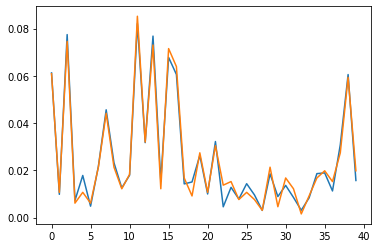

In [412]:
#plot frequency of tRNA vs. codon frequency plot for the new tRNA set vs old -- any new trends?
#validate genetic algorithm by optimizing for 0 distance w/ old set.
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
p_tRNA_list=np.load('RandomtRNA_FixedCodon_500sample_optimizesame_p_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_500sample_optimizesame_elong_t_list.npy')


print(gr25_ptRNA)
print(p_tRNA_list[np.argmin(elong_t_tRNA_list)])

plt.plot(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)])
plt.plot(np.arange(40),gr25_ptRNA)

tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))
print(np.min(elong_t_t))

##I might have just shown that a greedy evolutionary search leads to 
## what's seen in cells, whereas a global search leads to deeper minima.
## I should run this for 1500 too, and also i need to measure the slope
## of both elong time and fitness w/ epoch --> supp fig or main fig.
# Or maybe this is just a control, since greedy is expected here?

In [ ]:
###### Genetic algorithm for just tRNA shuffling ########

def run_ga(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,mintRNA,maxtRNA):
    
    #### Compute fitness
    fitness = (1/np.array(elong_t_tRNA_list))/sum((1/np.array(elong_t_tRNA_list)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    p_tRNA_list=np.array(p_tRNA_list)
    parents = p_tRNA_list[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(child_0,gr25_pCodon,gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(child_1,gr25_pCodon,gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    p_tRNA_list[cull_indices] = recombined_children
    elong_t_tRNA_list[cull_indices] = recombined_children_elongt
    return fitness, p_tRNA_list, elong_t_tRNA_list

    

In [ ]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')


fitness_arr = list()
minelong_arr = list()
for i in range(1500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA))
    print(max(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_t_tRNA_list))
#np.save('RandomtRNA_FixedCodon_1500sample_elong_t_list',elong_t_tRNA_list)
#np.save('RandomtRNA_FixedCodon_1500sample_p_tRNA_list',p_tRNA_list)



In [298]:
#np.save('ga_run',p_tRNA_list )
#np.save('ga_run_elongt',elong_t_tRNA_list)

[0.0608828  0.01065449 0.07458143 0.00608828 0.01065449 0.00608828
 0.02130898 0.04414003 0.02130898 0.01217656 0.01826484 0.08523592
 0.03196347 0.07305936 0.01217656 0.07153729 0.06392694 0.01674277
 0.00913242 0.02739726 0.01065449 0.0304414  0.01369863 0.0152207
 0.00761035 0.01065449 0.00761035 0.00304414 0.02130898 0.00456621
 0.01674277 0.01217656 0.00152207 0.00913242 0.01674277 0.01978691
 0.0152207  0.02739726 0.05936073 0.01978691]
[0.08112454 0.00154715 0.07059651 0.00324773 0.00454017 0.00178209
 0.03246667 0.05486676 0.00693073 0.00710437 0.01397985 0.0781318
 0.00616292 0.08114712 0.00370864 0.07205031 0.01689205 0.00380774
 0.07977939 0.00759734 0.00300472 0.07358624 0.00397009 0.0046228
 0.00858002 0.00165238 0.03304292 0.00228765 0.01197057 0.01010698
 0.00814795 0.00712314 0.03051354 0.00220433 0.03498217 0.01490561
 0.0037695  0.00173925 0.07431632 0.04200996]
[ 0.02024174 -0.00910734 -0.00398492 -0.00284055 -0.00611432 -0.00430619
  0.01115769  0.01072673 -0.014378

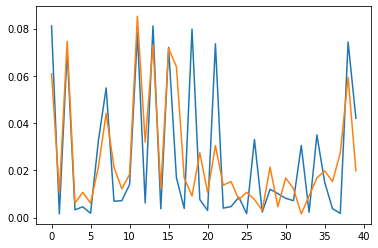

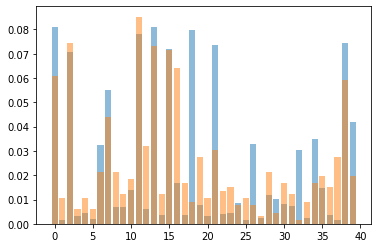

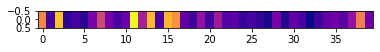

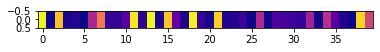

In [440]:
#plot frequency of tRNA vs. codon frequency plot for the new tRNA set vs old

gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
p_tRNA_list=np.load('RandomtRNA_FixedCodon_1500sample_p_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_1500sample_elong_t_list.npy')

print(gr25_ptRNA)
print(p_tRNA_list[np.argmin(elong_t_tRNA_list)])

plt.plot(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)])
plt.plot(np.arange(40),gr25_ptRNA)

plt.figure()
plt.bar(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)],alpha=0.5)
plt.bar(np.arange(40),gr25_ptRNA,alpha=0.5)

tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))

print(min(elong_t_tRNA_list))
plt.figure()
plt.imshow(gr25_ptRNA[np.newaxis,:],aspect=2,cmap='plasma')
plt.figure()
plt.imshow(p_tRNA_list[np.argmin(elong_t_tRNA_list)][np.newaxis,:],aspect=2,cmap='plasma')


## Is there a correlation betweeen tRNA and codon frequencies? If so,
## can I rationally design a steeper slope to get faster elong rate?
#

In [277]:
min(np.load('RandomtRNA_FixedCodon_300sample_elong_t_list.npy'))

200.67902537722506

In [278]:
min(elong_t_tRNA_list)

195.2486047804926

In [220]:
print(elong_t_tRNA_list[cull_indices])
print(recombined_children_elongt)

[224.12450991 224.89946055 227.96248872 224.5156997  224.52760198
 224.10695819 224.40484359 224.7936088  224.63093266 223.93871928]
[[210.84332327490725], [210.77908819951998], [209.35078684954274], [212.96339528555137], [211.9207151016579], [216.99015358137856], [213.0104375660295], [215.5414138038452], [215.91595670032913], [208.68568086878713]]


In [189]:
print(np.shape(p_tRNA_list[cull_indices]))
print(np.shape(recombined_children))

(10, 40)
(10, 40)


In [215]:
print(p_tRNA_list[cull_indices[0]])
recombined_children = [0]*40

[0.03763276 0.00207081 0.0251996  0.04440887 0.01718697 0.04657213
 0.0071353  0.0108258  0.02028983 0.03900254 0.04387212 0.01926724
 0.0138059  0.03113237 0.02486577 0.03012579 0.02429718 0.0120838
 0.03646297 0.01339319 0.03762922 0.02842444 0.00133165 0.03071389
 0.04746966 0.01018428 0.02064657 0.04443736 0.02385558 0.00976634
 0.0249413  0.04751034 0.01318199 0.01497173 0.02757419 0.03002624
 0.01298271 0.00769174 0.02146909 0.04556074]


In [216]:
p_tRNA_list[cull_indices[0]] = recombined_children

In [217]:
p_tRNA_list[cull_indices[0]]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [74]:
int(len(couple[0])*recombination_rate)

6

In [82]:
a=np.random.choice(len(couple[0]),5)

In [89]:
 couple[0][a] = [0,0,0,0,0]

In [94]:
recombination_locs

array([61, 60,  4, 32, 35, 39])

In [106]:
parent_indices

array([2969, 5155, 8106, 1815, 3032, 8303, 3547, 3487, 8394, 5371])

In [300]:
#np.save('RandomtRNA_RandomCodon_10ksample_p_Codon_tRNA_list',p_Codon_tRNA_list)
#np.save('RandomtRNA_RandomCodon_10ksample_elong_t_list',elong_t_list_codon_tRNA_distrib)

#np.save('FixedtRNA_RandomCodon_10ksample_p_Codon_tRNA_list',p_Codon_list)
#np.save('FixedtRNA_RandomCodon_10ksample_elong_t_list',elong_t_list_codon_distrib)

#np.save('RandomtRNA_FixedCodon_10ksample_p_Codon_tRNA_list',p_tRNA_list)
#np.save('RandomtRNA_FixedCodon_10ksample_elong_t_list',elong_t_tRNA_list)


#np.save('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list',p_tRNA_list)
#np.save('RandomtRNA_FixedCodon_100sample_elong_t_list',elong_t_tRNA_list)
